Test Code to demonstrate the use of the video proc algorithm

In [1]:
from src import hrNetVideo, lpipsClass, readFrames
import numpy as np
import matplotlib.pyplot as plt
# TO-DO: write/improve descriptions for classes and functions (not important, but helps with understanding code later on)

2023-02-23 12:27:17.342577: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/nwaliv/miniconda3/envs/hrNet/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


To process a video, add the video properties down below

In [2]:
vidFileName = 'dataset/KristenAndSara_10frames_512x256.yuv420p'
# Note the Kristen video has a length of 7 frames
vidResolution = (512,256)
vidNumFrames = 7

Create an instance of the video restoration model using the video properties. The video restoration model allows
for the restoration of one frame (using the restore_frame() function) or an entire video (restore_video() function)

In [3]:
hrNetVideoModel = hrNetVideo(vidFileName,vidResolution,vidNumFrames)

2023-02-23 12:27:26.138234: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-23 12:27:26.139270: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


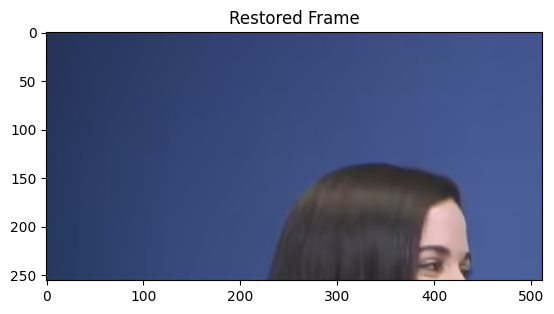

In [4]:
# Takes about 10 min to run for a 1080p video on my laptop
restoredFrame = hrNetVideoModel.restore_frame(t=1)
plt.imshow(restoredFrame/255.0)
plt.title("Restored Frame")
plt.show()
plt.imsave("output/restoredFrame.png",restoredFrame/255.0)

In [5]:
# Produces an array of restored videos
#restoredVideo = hrNetVideoModel.restore_video()

In [6]:
#plt.imshow(restoredVideo[1]/255)
#plt.title("Restored Frame (selected from restored video array)")
#plt.show()

LPIPS is a full-reference metric, and such the frame of a reference video is also selected

(256, 512, 3)


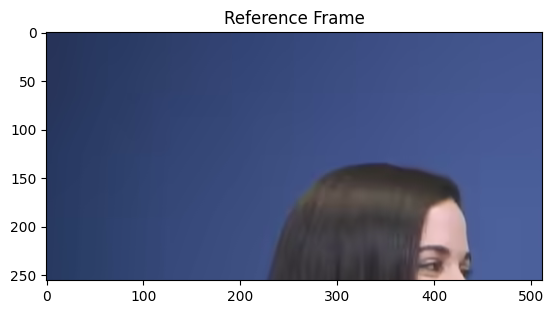

In [6]:
vidFileName = 'dataset/KristenAndSara_10frames_512x256.yuv420p'
_,refFrame,_ = readFrames(vidFileName,vidResolution,1,vidNumFrames)
print(refFrame.shape)
plt.imshow(refFrame/255.0)
plt.imsave("output/referenceFrame.png",refFrame/255.0)
plt.title("Reference Frame")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


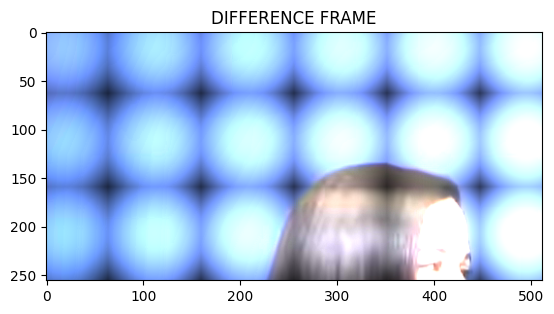

In [7]:
# Calculating the difference frame
difference_frame = np.absolute(np.subtract(restoredFrame,refFrame))
plt.imshow(difference_frame)
plt.title("DIFFERENCE FRAME")
plt.show()

Creates an instance of LPIPS, which compares two frames

In [8]:
lpipsInstance = lpipsClass()

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


/home/nwaliv/miniconda3/envs/hrNet/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/nwaliv/miniconda3/envs/hrNet/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/nwaliv/miniconda3/envs/hrNet/lib/python3.10/site-packages/lpips/weights/v0.1/vgg.pth


In [9]:
#Outputs the LPIPS metric evaluation for the original frame t and the restored frame (the two inputs)
dist = lpipsInstance.computeLpipsFrame(original_frame=refFrame,restored_frame=restoredFrame)
print(dist.item())

/home/nwaliv/MAIProject-main/src/lpipsFunctions.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x), torch.tensor(y)


0.0006471300730481744
